In [1]:
from AnastrisTNG import TNGsimulation, TNGtools, Anatools, TNGmergertree  
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scienceplots
plt.style.use(['science','no-latex'])

In [3]:
run = 'TNG50'
BasePath = '/home/dumin/IllustrisTNG/' + run + '-1/output/'         
snap=99                                                            

In [4]:
Snapshot=TNGsimulation.Snapshot(BasePath,snap)                    

In [5]:
sub = Snapshot.load_particle(ID=10)

In [6]:
sub.physical_units()
sub.face_on(alignwith='star',rmax=8)

单位物理化，并让星系 face on,  \
face on 的更多详情， 见 [AnastrisTNG_galaxy_face_on-cn.ipynb](./AnastrisTNG_galaxy_face_on-cn.ipynb)

### 星系三维，恒星的半质量半径 re

In [8]:
sub.re

SimArray(6.41461465, 'kpc')

### 星系二维投影x-y平面，恒星的半质量半径 Re

In [9]:
sub.Re

SimArray(6.19853736, 'kpc')

### r 与 R

In [10]:
sub.r(frac=0.8,calfor='gas',calpa='mass',rmax=30)

SimArray(13.64113441, 'kpc')

func: sub.r() \
frac: 取值0~1，计算多大的占比，若为 0.5 -> 类似于 半质量半径，\
calfor: 为什么物质计算，气体：‘gas’，恒星：‘star’，重子物质：‘baryon’，暗物质：‘dm’，所有物质：‘all’，\
calpa：计算什么参数，‘mass’，则为质量，\
rmax：限制物质的计算范围，类似的有 rmin, Rmin, Rmax, zmax。。。 \ 

In [11]:
sub.R(frac=0.2,calfor='baryon',calpa='mass',Rmax=15)

SimArray(1.32898036, 'kpc')

参数类似于 sub.r， 只不过返回 二维投影 的半径 R

### 密度 与 面密度

In [30]:
sub.rho(rmax=1,calfor = 'star',calpa='mass') # 1kpc内 恒星 质量密度

SimArray(1.75116804e+09, 'Msol kpc**-3')

rmax计算多大范围， \
calfor：见上文 \
calpa：若为mass 则为密度

In [31]:
sub.Sigma(Rmax=3,calfor='gas',calpa='mass',Rmin=2,zmax=1) # 投影半径2-3kpc内，z在1kpc内的，气体的质量面密度

SimArray(243816.4807986, 'Msol kpc**-2')

Rmax 最大半径 \
Rmin 最小半径 \
zmax，若传入，则限制z 高度处于 -zmax~zmax 之间。\
其余同上

### 计算 位力半径

In [12]:
sub.R_vir(cen=[0,0,0],overden=178,)

SimArray(147.03635617, 'kpc')

cen 中心坐标位置，如果没有传入，则使用ssc方法 计算中心坐标后 再计算 位力半径 \
overden 多少倍的宇宙临界密度，178倍为位力半径， 200，与500，也常用。\
rho_def 默认为 ‘critical’ ，即宇宙临界密度。 注意宇宙临界密度随红移变化 

### 计算 krot

In [13]:
sub.krot(calfor='star',rmax=30) #计算 r < 30 内的 当前坐标系统下 恒星的krot

array(0.72646002)

In [14]:
sub.krot(calfor='star',rmax=30, calmode = 'max')

{'krotmax': 0.7264616687262611,
 'krotvec': array([-9.53126674e-04,  2.50283187e-03,  9.99996414e-01]),
 'krotmat': array([[ 9.99999546e-01, -0.00000000e+00,  9.53129659e-04],
        [ 2.38552328e-06,  9.99996868e-01, -2.50283073e-03],
        [-9.53126674e-04,  2.50283187e-03,  9.99996414e-01]]),
 'angle': 0.15344826999494784}

计算 拟合得到的 最大krot，\
krotmax，为最大krot \
krotvec，最大krot的 单位方向向量， \
krotmat，转动到最大krot同方向的，转动矩阵， \
angle，最大krot的方向 与当前z轴的 夹角，单位 度，范围 0~90。\

calfor ： 见上文，与之前 作用相同 \
rmax： 见上文， \
calmode：默认为‘now’，即为当前坐标系下的krot。‘max’，则为最大的krot \

### 中心坐标与速度

In [15]:
https://www.tng-project.org/data/docs/specifications/#sec2bsub.center()

SimArray([-7.73286348e-06,  2.23856670e-05,  2.32785573e-05], 'kpc')

计算中心坐标，因为已经face on了，所以几乎为0,0,0. \
mode : 计算方式， ‘pot’， ‘com’，‘ssc’，‘hyb’ \
默认为‘ssc’，‘com’为质心，‘pot’为引力势最低点，‘hyb’与‘pot’ 需要计算引力势。\

In [17]:
sub.vel_center()

SimArray([ 0.00028406, -0.00092276, -0.00061919], 'km s**-1')

计算中心速度，因为已经face on了，所以几乎为0,0,0. \
mode : 计算中心坐标方式， ‘pot’， ‘com’，‘ssc’，‘hyb’ \
pos : 如果传入了 pos， 则以该pos为中心 计算速度，\
r_cal: 计算范围，默认为'1 kpc'

### 角动量与惯性矩

In [18]:
sub.ang_mom_vec(alignwith = 'star', rmax=30) 

array([-3.13940939e+11,  6.55965267e+11,  7.38596277e+13])

计算当前坐标系下 角动量 \
alignwith 与 calfor的作用相同，\
rmax ： 见上文

In [19]:
sub.moi_shape(calfor='dm',calpa = 'mass', rmax = 30)

(array([13.88295008]),
 array([14.63247497, 14.41763017, 12.68333943]),
 array([329482]),
 array([[-0.02878249, -0.99862584, -0.04379487],
        [ 0.99620462, -0.03225813,  0.08084409],
        [-0.08214574, -0.04130176,  0.99576415]]),
 5.275472054207785)

计算惯性矩 \
calfor ：见上文 \
calpa ：见上文 \
rmax ... 见上文 \
返回值 ： \
    半径， \   
    三轴长度: (a,b,c)，\
    计算用到的粒子总数， \
    对齐，a,b,c到 x,y,z，的转动矩阵。 \
    c与z方向的夹角，单位 度。 \

### 星系的组装历史与恒星形成历史

In [20]:
Snapshot.load_particle_para['star_fields']=['GFM_StellarFormationTime','GFM_InitialMass']
sub = Snapshot.load_particle(ID=10)
sub.physical_units()
sub.face_on(alignwith='star',rmax=8)

需要用到 恒星粒子的形成时间 GFM_StellarFormationTime 和 形成时质量 GFM_InitialMass \
所以重新载入

In [22]:
sfr = sub.sfh(nbins=200,massmode='birth')

nbins 用于给时间分bin \
massmode 可以为 ‘birth’ 则用GFM_InitialMass，‘now’ 则用当前的 恒星粒子mass

In [23]:
massevo = sub.sfh(nbins=200,massmode='now')

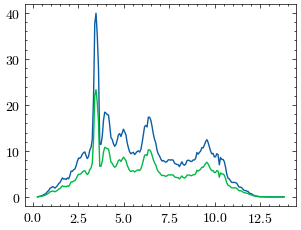

In [24]:
plt.plot(sfr['t'],sfr['sfr'])
plt.plot(massevo['t'],massevo['sfr'])

恒星形成历史，使用 massmode='birth' 来估计会更准确些

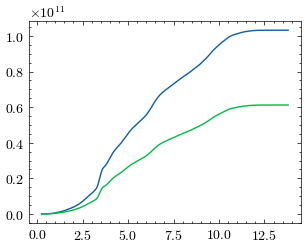

In [26]:
plt.plot(sfr['t'],sfr['mass'])
plt.plot(massevo['t'],massevo['mass'])

星系质量增长历史， 真实情况大概率位于两者中间

In [27]:
sub.t_star(frac=0.5)

SimArray(5.67825842, 'Gyr')

质量增长到 一半时的时间，默认massmode = ‘now’

In [28]:
sub.t_star(frac=0.5,massmode='birth')

SimArray(5.60907269, 'Gyr')

使用 恒星诞生时的质量计算。

In [29]:
sub.star_t(10)

SimArray(5.60351512e+10, 'Msol')

计算给定时间 单位Gyr，星系的恒星质量

### 星系的groupcatalog

In [33]:
sub.GC.keys()

dict_keys(['a', 'h', 'omegaM0', 'omegaL0', 'omegaB0', 'sigma8', 'ns', 'boxsize', 'Halos_total', 'Subhalos_total', 'filedir', 'Snapshot', 'run', 'eps', 'Mdm', 'baseunits', 'staunit', 'SubhaloID', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloFlag', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad',

In [34]:
sub.GC['SubhaloHalfmassRad']

SimArray(17.646923, dtype=float32, 'kpc')

放在了sub.GC中 \
介绍见 https://www.tng-project.org/data/docs/specifications/#sec2b 